In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as const
import astropy.units as u
plt.rcParams['font.size'] = 25


In [90]:
dataframe = pd.read_csv('run1_revised.csv')
dataframe

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC
0,96.020,-4580.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,0.001548,0.002112,0.005112,0.004522,-0.002377,-0.002848,-0.005624,-0.004727
1,97.315,-35.540001,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,0.001034,0.001336,0.000055,-0.000330,-0.001832,-0.002036,-0.000540,0.000082
2,98.550,4579.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,0.001635,0.001931,-0.004839,-0.005493,-0.002445,-0.002621,0.004387,0.005252
3,100.210,-4592.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,0.001610,0.002190,0.005169,0.004534,-0.002441,-0.002927,-0.005653,-0.004745
4,101.485,-31.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,0.001091,0.001403,0.000068,-0.000349,-0.001893,-0.002106,-0.000534,0.000096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,343.200,-30.080000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000189,-0.000191,-0.000234,-0.000209,-0.000371,-0.000403,-0.000262,-0.000179
164,344.700,4569.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000198,-0.000196,-0.000206,-0.000177,-0.000377,-0.000405,-0.000280,-0.000192
165,346.500,-4581.000000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000195,-0.000212,-0.000268,-0.000226,-0.000359,-0.000399,-0.000246,-0.000154
166,347.950,-30.230000,0.000005,0.000005,0.000005,0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000208,-0.000220,-0.000240,-0.000196,-0.000358,-0.000387,-0.000263,-0.000177


# Resistivity and Hall Coefficient of the Sample at Room Temperature

In [91]:
def cosh_function(x):
    return 1/np.cosh(np.log(x.value)/2.403)

In [92]:
room_temperature = 300 #K
print(np.where(np.isclose(dataframe['Temperature (K)'], 296.5, rtol = 1e-1) == True)) #Indices to check for room temperature similarities

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),)


In [93]:
 dataframe.iloc[137] # Select a row number

Temperature (K)     301.250000
B-Field (Gauss)    4568.000000
sample I AB           0.000005
sample I AD           0.000005
sample I AC           0.000005
sample I BD           0.000005
sample I -AB         -0.000005
sample I -AD         -0.000005
sample I -AC         -0.000005
sample I -BD         -0.000005
Voltage DC            0.000320
Voltage BC            0.000420
Voltage BD            0.000029
Voltage AC           -0.000169
Voltage -DC          -0.000841
Voltage -BC          -0.000932
Voltage -BD          -0.000486
Voltage -AC          -0.000293
Name: 137, dtype: float64

In [94]:
index = dataframe.iloc[137]
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = index['B-Field (Gauss)'] * u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = index['Voltage BD']/index['sample I AC'] * u.Ohm 
racbd_error = np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) * u.Ohm

rbdac = index['Voltage AC']/index['sample I BD'] * u.Ohm
rbdac_error = np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2) * u.Ohm


rabdc = index['Voltage DC']/index['sample I AB'] * u.Ohm
rabdc_error = np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2) * u.Ohm

radbc = index['Voltage BC']/index['sample I AD'] * u.Ohm
radbc_error = np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) * u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [95]:
print("Hall coefficient at room temperature is:", np.round(rh,6), "with an error of", np.round(rh_error,6))
print("Resistivity at room temperature is:", np.round(resistivity,6), "with an error of", np.round(resistivity_error,6))

Hall coefficient at room temperature is: 0.038255 m3 / C with an error of 0.003411 m3 / C
Resistivity at room temperature is: 0.417092 m Ohm with an error of 0.012369 m Ohm


# Plot of Resistivity vs Inverse Temperature


In [96]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [97]:
rabdc_pos = dataframe_pos['Voltage DC']/dataframe_pos['sample I AB'] # Ohm
rabdc_error_pos = np.sqrt((voltage_error.value/dataframe_pos['sample I AB'])**2 + (current_error.value/dataframe_pos['Voltage DC'])**2) #Ohm
radbc_pos = dataframe_pos['Voltage BC']/dataframe_pos['sample I AD'] #Ohm
radbc_error_pos = np.sqrt((voltage_error.value/dataframe_pos['sample I AD'])**2 + (current_error.value/dataframe_pos['Voltage BC'])**2) #Ohm
resistance_error_pos = np.sqrt(1/4*rabdc_error_pos**2 + 1/4*radbc_error_pos) #Ohm

In [98]:
rabdc_neg = dataframe_neg['Voltage DC']/dataframe_neg['sample I AB'] # Ohm
rabdc_error_neg = np.sqrt((voltage_error.value/dataframe_neg['sample I AB'])**2 + (current_error.value/dataframe_neg['Voltage DC'])**2) #Ohm
radbc_neg = dataframe_neg['Voltage BC']/dataframe_neg['sample I AD'] #Ohm
radbc_error_neg = np.sqrt((voltage_error.value/dataframe_neg['sample I AD'])**2 + (current_error.value/dataframe_neg['Voltage BC'])**2) #Ohm
resistance_error_neg = np.sqrt(1/4*rabdc_error_neg**2 + 1/4*radbc_error_neg) #Ohm

In [99]:
rabdc_zero = dataframe_zero['Voltage DC']/dataframe_zero['sample I AB'] # Ohm
rabdc_error_zero = np.sqrt((voltage_error.value/dataframe_zero['sample I AB'])**2 + (current_error.value/dataframe_zero['Voltage DC'])**2) #Ohm
radbc_zero = dataframe_zero['Voltage BC']/dataframe_zero['sample I AD'] #Ohm
radbc_error_zero = np.sqrt((voltage_error.value/dataframe_zero['sample I AD'])**2 + (current_error.value/dataframe_zero['Voltage BC'])**2) #Ohm
resistance_error_zero = np.sqrt(1/4*rabdc_error_zero**2 + 1/4*radbc_error_zero) #Ohm

In [100]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i)/2.403))
    return series

temperature = dataframe_pos['Temperature (K)']
inverse_temperature = 1/temperature

resistivity_pos = (np.pi*d/np.log(2)) * ((rabdc_pos+radbc_pos)/2) * cosh_function((rabdc_pos/radbc_pos))
resistivity_error_pos = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_pos]


resistivity_neg = (np.pi*d/np.log(2)) * ((rabdc_neg+radbc_neg)/2) * cosh_function((rabdc_neg/radbc_neg))
resistivity_error_neg = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_neg]


resistivity_zero = (np.pi*d/np.log(2)) * ((rabdc_zero+radbc_zero)/2) * cosh_function((rabdc_zero/radbc_zero))
resistivity_error_zero = [(np.sqrt((i * length.value)**2 + (length_error.value * i)**2))for i in resistance_error_zero]

Text(0.5, 1.0, 'Resistivity vs Inverse Temperature')

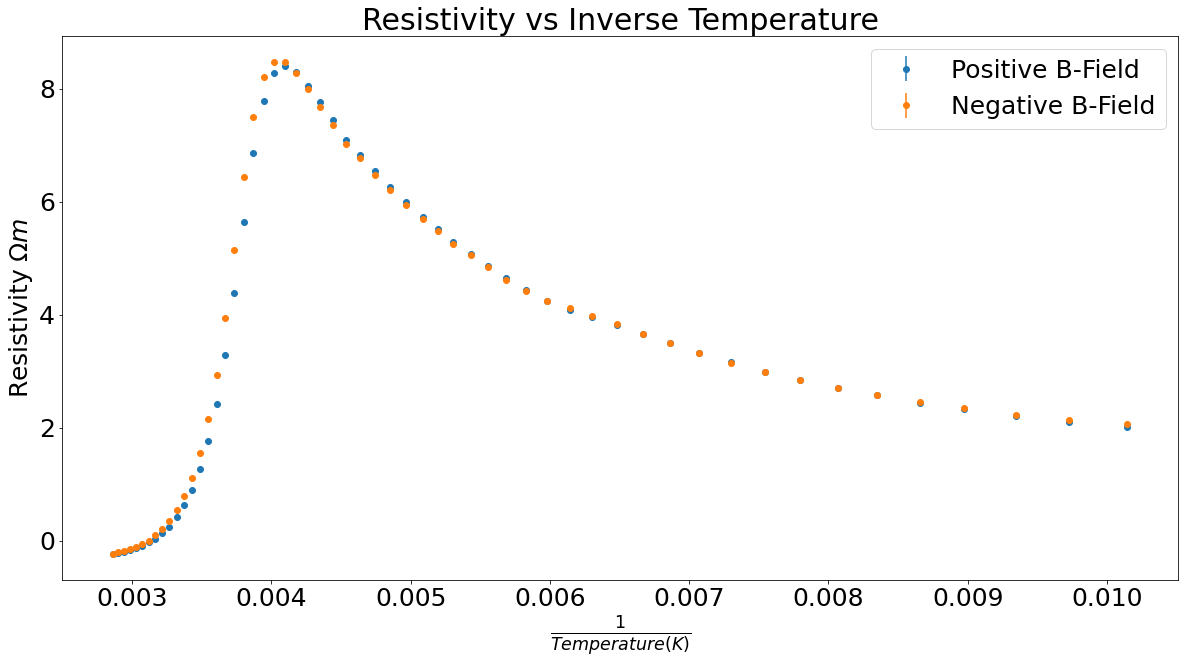

In [101]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, resistivity_pos, yerr =resistivity_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, resistivity_neg, yerr =resistivity_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Resistivity $\Omega m$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Resistivity vs Inverse Temperature')

# Conductivity vs Temperature

Text(0.5, 1.0, 'Conductivity vs Inverse Temperature')

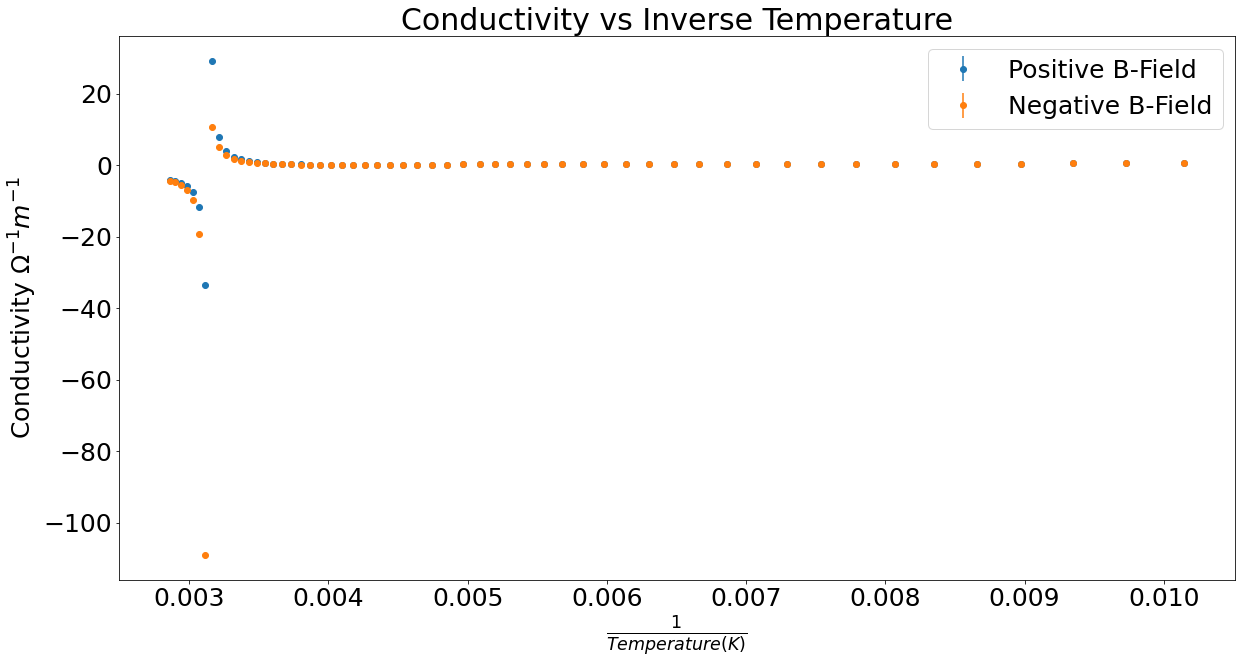

In [102]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, 1/resistivity_pos, yerr =resistivity_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, 1/resistivity_neg, yerr =resistivity_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Conductivity $\Omega^{-1} m^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Conductivity vs Inverse Temperature')

# Hall Coefficienct vs Inverse Temperature

In [103]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
    return series

index = dataframe
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm


rabdc = np.array(index['Voltage DC']/index['sample I AB']) * u.Ohm
rabdc_error = np.array(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) * u.Ohm

radbc = np.array(index['Voltage BC']/index['sample I AD']) * u.Ohm
radbc_error = np.array(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) )* u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh_pos = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error_pos = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')


Text(0.5, 1.0, 'Hall Coefficient vs Inverse Temperature')

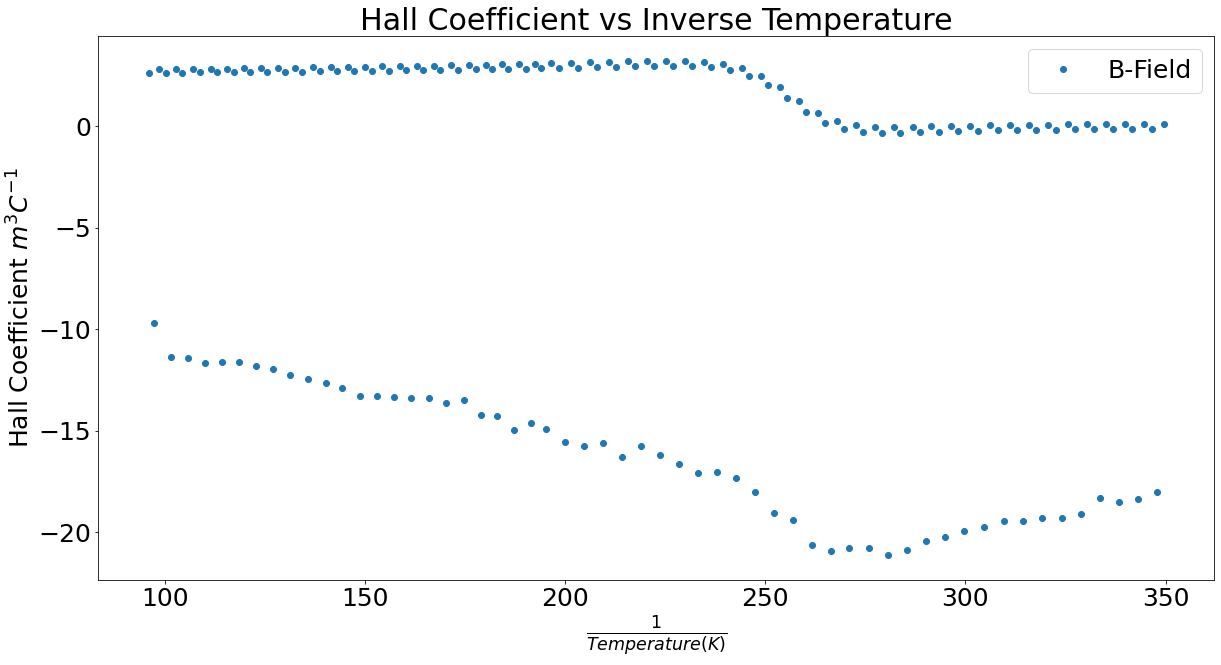

In [104]:
plt.figure(figsize=(20,10))
plt.errorbar(dataframe['Temperature (K)'], rh_pos,  marker='o', linestyle = 'none', label = 'B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Coefficient vs Inverse Temperature')

In [105]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [106]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
    return series

index = dataframe_pos
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm


rabdc = np.array(index['Voltage DC']/index['sample I AB']) * u.Ohm
rabdc_error = np.array(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) * u.Ohm

radbc = np.array(index['Voltage BC']/index['sample I AD']) * u.Ohm
radbc_error = np.array(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) )* u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh_pos = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error_pos = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [107]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
    return series

index = dataframe_neg
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = np.array(index['Voltage -BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage -AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm


rabdc = np.array(index['Voltage -DC']/index['sample I AB']) * u.Ohm
rabdc_error = np.array(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) * u.Ohm

radbc = np.array(index['Voltage -BC']/index['sample I AD']) * u.Ohm
radbc_error = np.array(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) )* u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh_neg = (trans_resistance/magnetic_field * d).to('m^3/C')
rh_error_neg = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

Text(0.5, 1.0, 'Hall Coefficient vs Inverse Temperature')

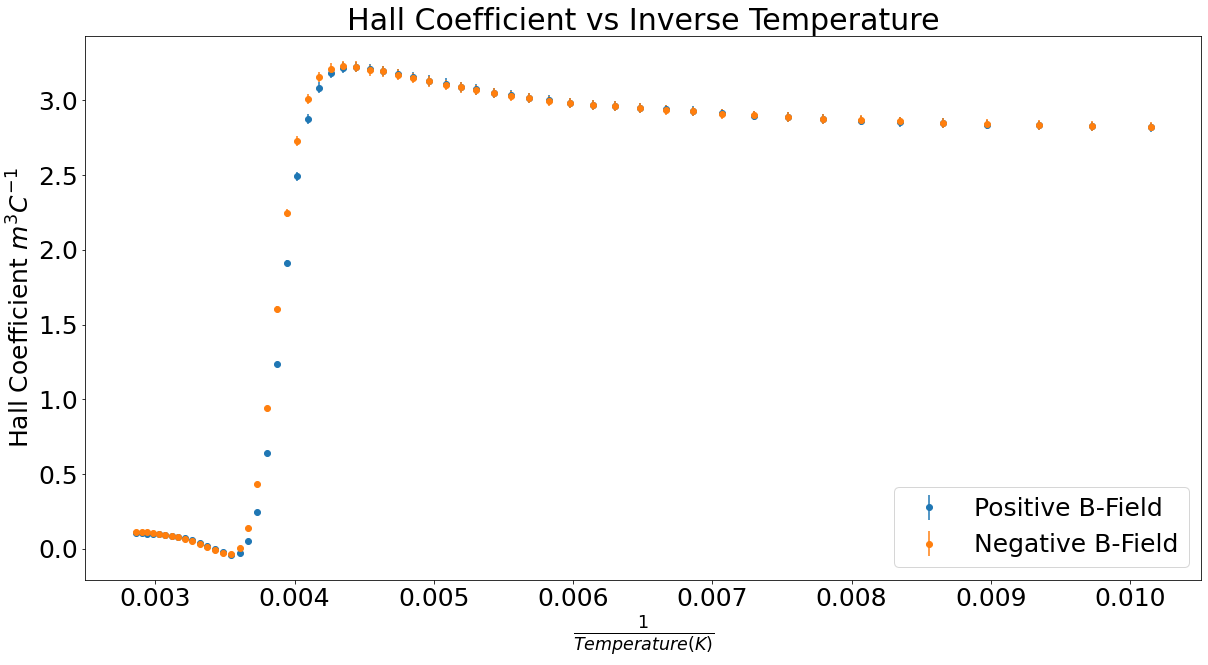

In [108]:
plt.figure(figsize=(20,10))
plt.errorbar(inverse_temperature, rh_pos, yerr =rh_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(inverse_temperature, rh_neg, yerr =rh_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Coefficient vs Inverse Temperature')

# Plot (Hall coefficient X conductivity) versus T. Where does Hall coefficient becomes zero

In [39]:
pos_conductivity = np.array(1/resistivity_pos) * u.Ohm**-1 * u.m**-1
neg_conductivity = np.array(1/resistivity_neg) * u.Ohm**-1 * u.m**-1

temp = resistivity_error_pos * u.Ohm * u.m
conductivity_pos_error = np.sqrt((-pos_conductivity**2*temp)**2)

temp = resistivity_error_neg * u.Ohm * u.m
conductivity_neg_error = np.sqrt((-neg_conductivity**2*temp)**2)

In [40]:
rhconpos = rh_pos * pos_conductivity
rhconpos_error = np.sqrt((rh_error_pos*pos_conductivity)**2 + (conductivity_pos_error*rh)**2)
max_index = np.where(rhconpos_error==np.max(rhconpos_error))
rhconpos_error = np.delete(rhconpos_error, max_index)
rhconpos = np.delete(rhconpos, max_index)
correct_temp_pos = np.delete(np.array(inverse_temperature), max_index)


rhconneg = rh_neg * neg_conductivity
rhconneg_error = np.sqrt((rh_error_neg*neg_conductivity)**2 + (conductivity_neg_error*rh)**2)
max_index = np.where(rhconneg_error==np.max(rhconneg_error))
rhconneg_error = np.delete(rhconneg_error, max_index)
rhconneg = np.delete(rhconneg, max_index)
correct_temp_neg = np.delete(np.array(inverse_temperature), max_index)
#np.delete(inverse_temperature, max_index)

#rhconneg_error[max_index] = np.max(rhconpos_error)

Text(0.5, 1.0, 'Hall Mobility vs Inverse Temperature')

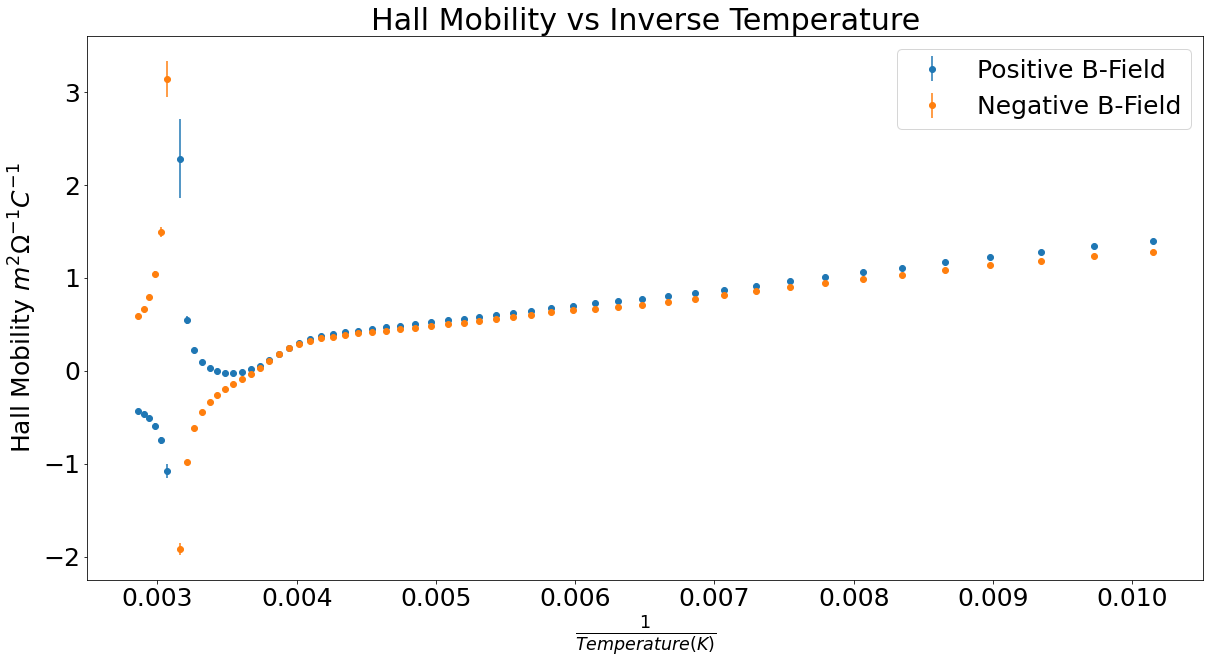

In [41]:
plt.figure(figsize=(20,10))
plt.errorbar(correct_temp_pos, rhconpos, yerr = rhconpos_error, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(correct_temp_neg, rhconneg, yerr = rhconneg_error, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Mobility vs Inverse Temperature')

# Explain what type of material we have: p-type or n-type. (Why don’t you need to know the direction of the magnetic field after all?)

# Find electron or hole concentrations for the sample versus temperature.

Text(0, 0.5, 'Concentration')

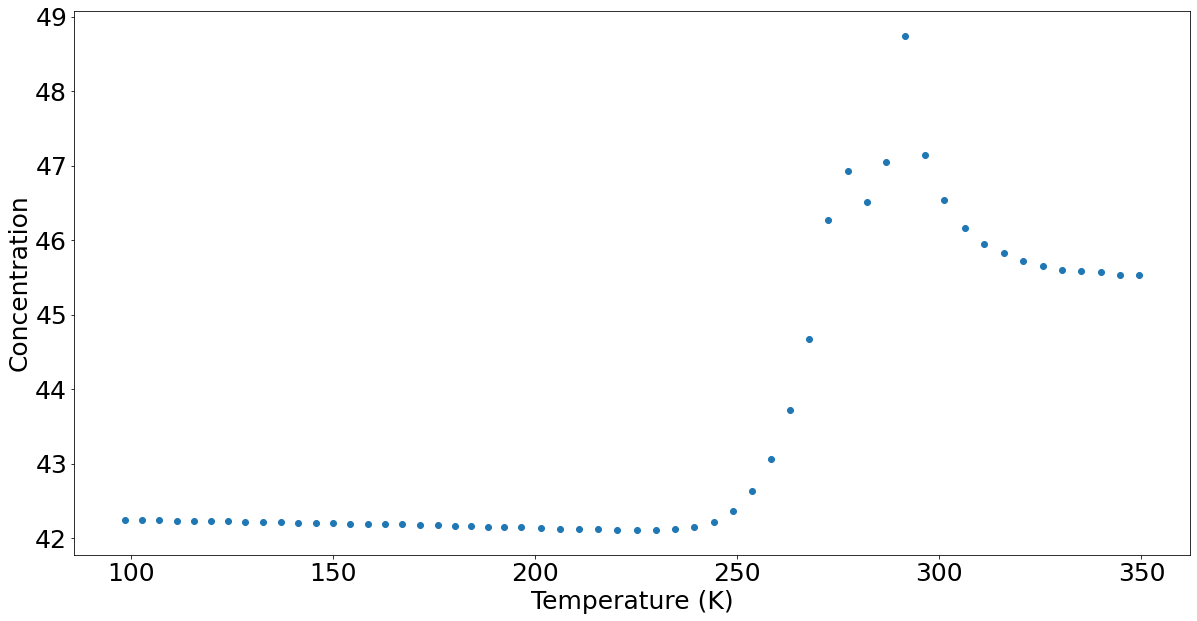

In [46]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.scatter(1/inverse_temperature, np.log(np.abs(concentration.value)))
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')

# Find the Hall Coefficient RH and Hall mobility

Text(0.5, 1.0, 'Hall Coefficient vs Temperature')

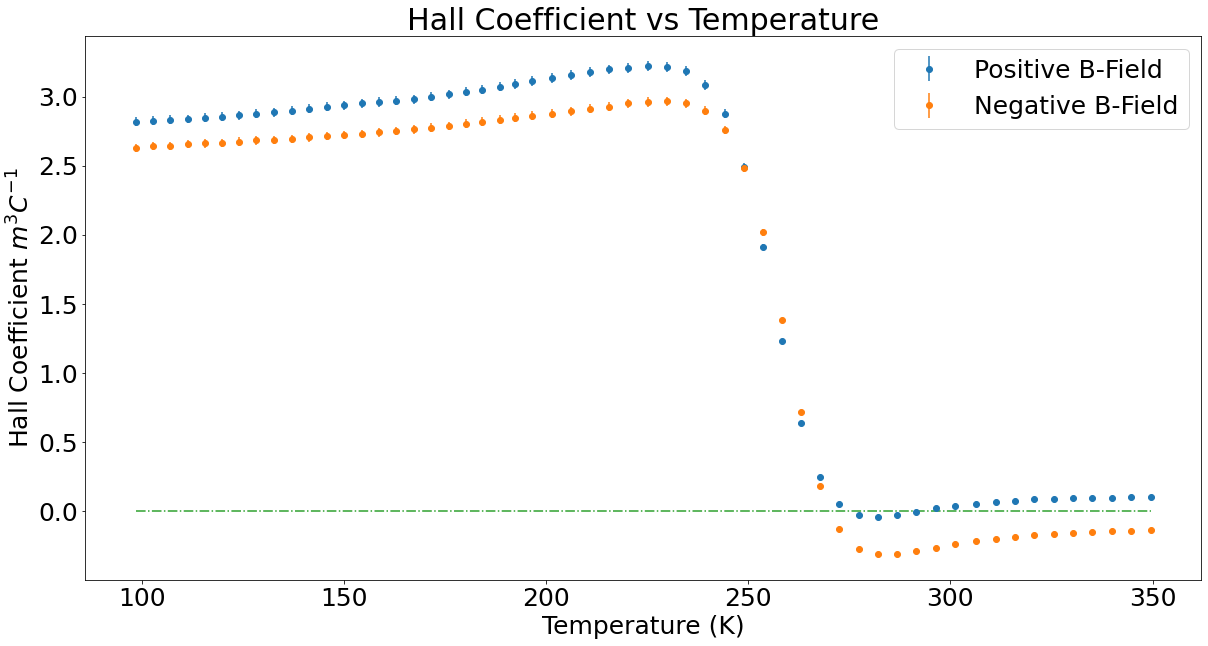

In [57]:
plt.figure(figsize=(20,10))
plt.errorbar(1/inverse_temperature, rh_pos, yerr =rh_error_pos, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/inverse_temperature, rh_neg, yerr =rh_error_neg, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.plot(temperature, np.zeros(len(temperature)), '-.')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')

In [48]:
np.shape(rhconpos)

(55,)

Text(0.5, 1.0, 'Hall Mobility vs Temperature')

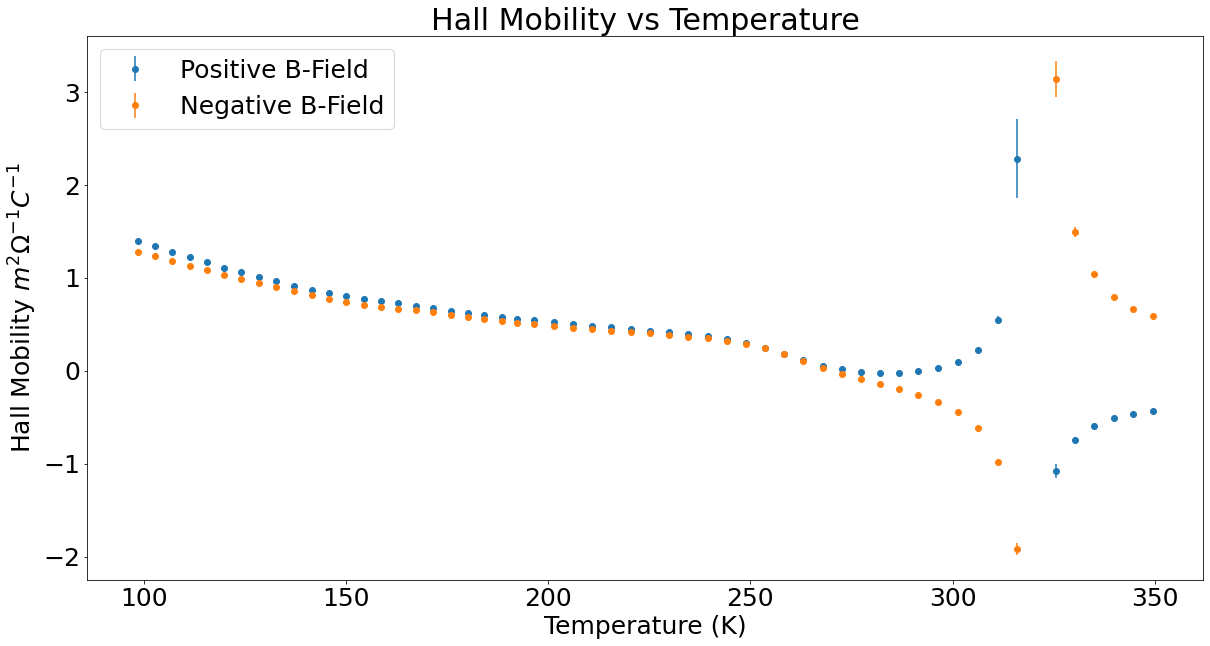

In [49]:
plt.figure(figsize=(20,10))
plt.errorbar(1/correct_temp_pos, rhconpos, yerr = rhconpos_error, marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/correct_temp_pos, rhconneg, yerr = rhconneg_error, marker='o', linestyle = 'none', label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.


(42.1, 42.25)

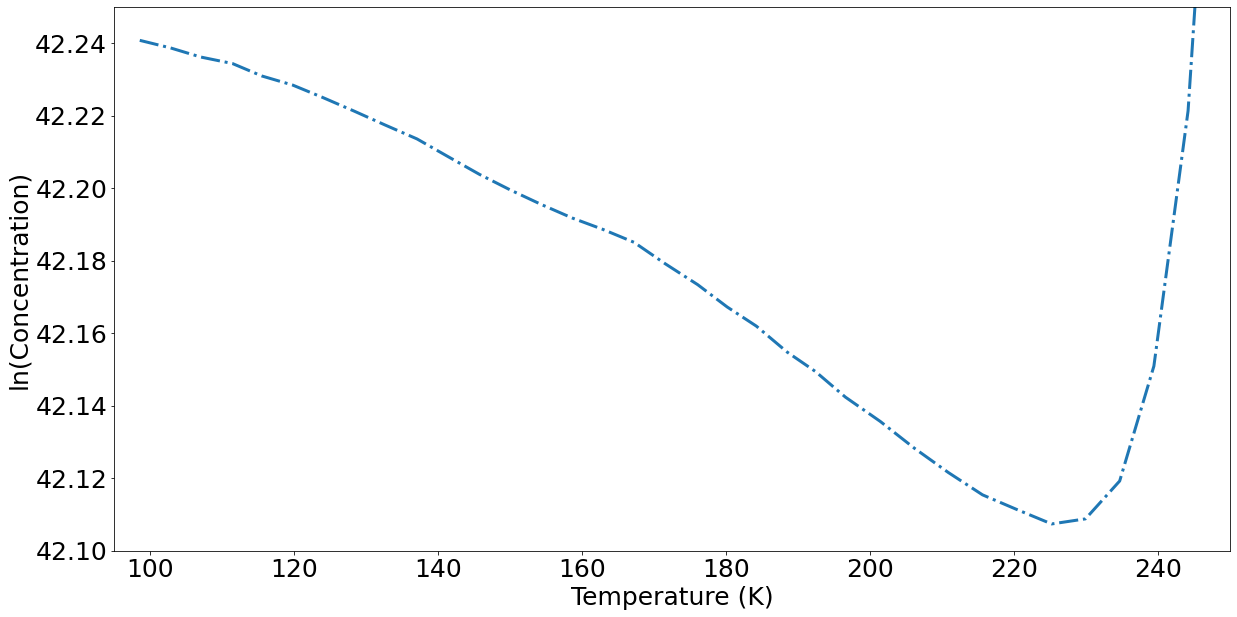

In [50]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(1/inverse_temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(95, 250)
plt.ylim(42.1, 42.250)


(42.1, 42.12)

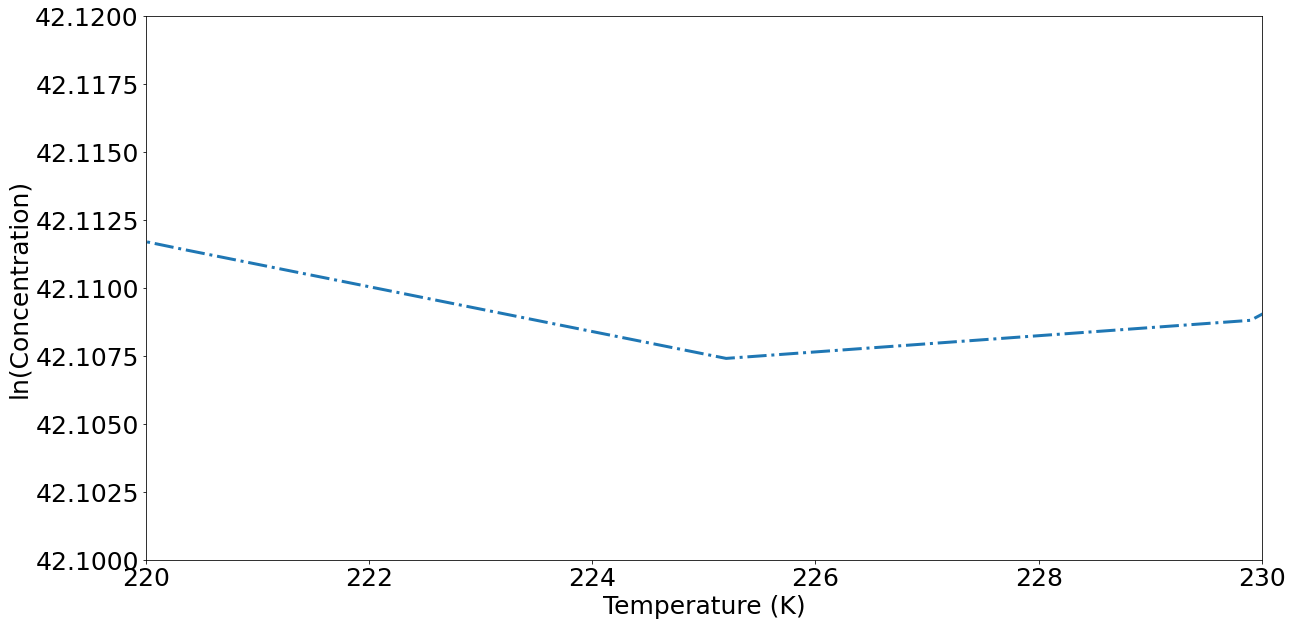

In [51]:

plt.figure(figsize=(20,10))
concentration = 1/(rh_pos*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(1/inverse_temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(220, 230)
plt.ylim(42.1, 42.12)


# Find electron and hole mobilities in the extrinsic region.


(0.3, 0.5)

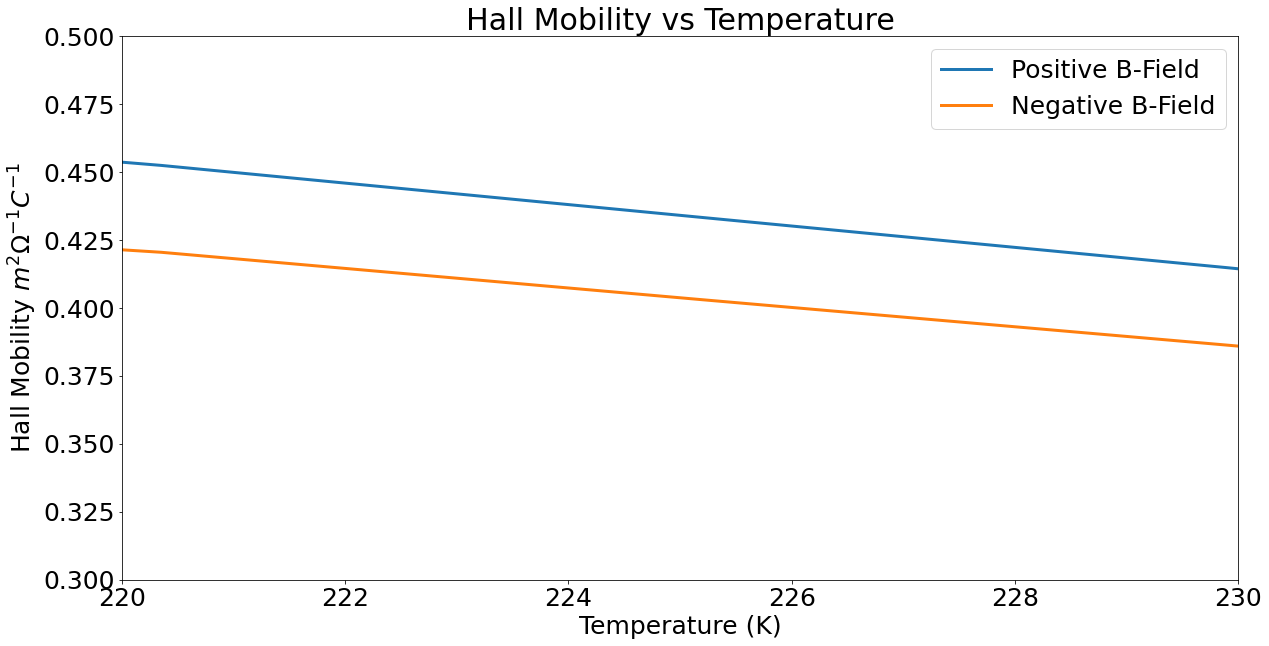

In [52]:
plt.figure(figsize=(20,10))
plt.plot(1/correct_temp_pos, rhconpos, linewidth = 3, label = 'Positive B-Field')
plt.plot(1/correct_temp_pos, rhconneg, linewidth = 3, label = 'Negative B-Field')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')
plt.xlim(220, 230)
plt.ylim(0.3,.5)

# Compare the resistance measured for the sample (at zero field) with the magnetoresistance (the resistance measured while the magnetic field is on).


Text(0.5, 0, 'Temperature (K)')

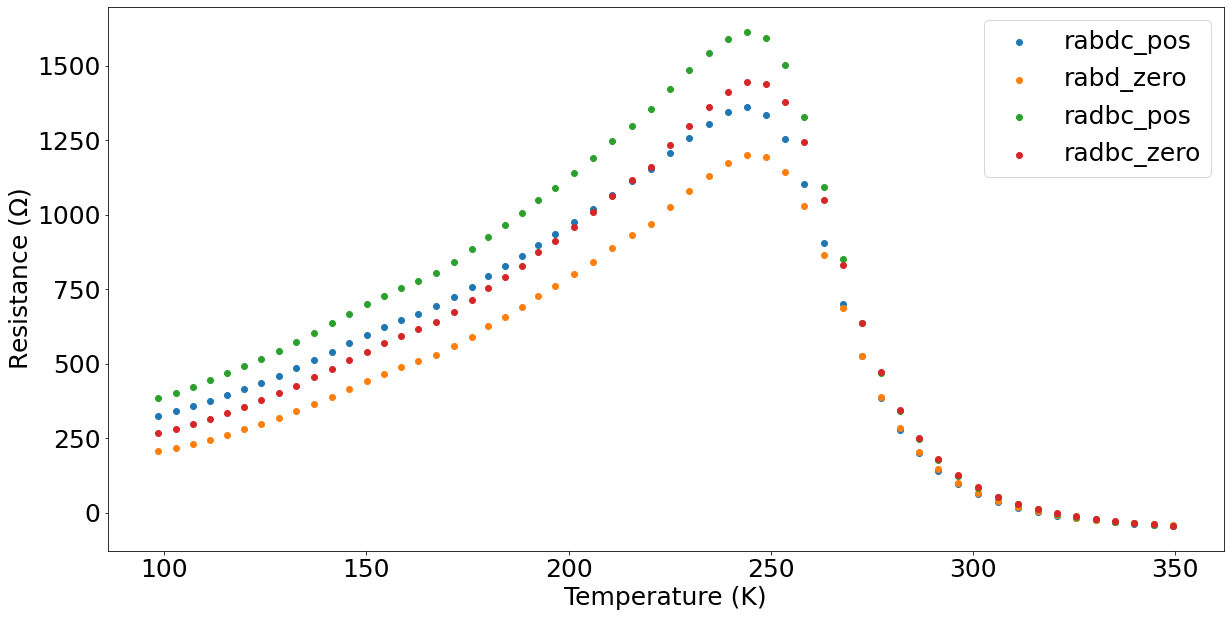

In [53]:
plt.figure(figsize=(20,10))
plt.scatter(temperature, rabdc_pos, label = 'rabdc_pos')
plt.scatter(temperature, rabdc_zero, label = 'rabd_zero')

plt.scatter(temperature, radbc_pos, label = 'radbc_pos')
plt.scatter(temperature, radbc_zero, label = 'radbc_zero')
plt.legend(loc='best')
plt.ylabel(r'Resistance ($\Omega$)')
plt.xlabel(r'Temperature (K)')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.
# Find electron and hole mobilities in the extrinsic region.
# Last day of the experiment please fill out the Experiment Evaluation